# 泰坦尼克号生还者预测竞赛

### 1. 利用pandas库导入数据

In [6]:
# 导入数据结构分析模块
import pandas as pd

# 读取训练数据以及测试数据集，并进行一些相应的预处理
train_df = pd.read_csv("泰坦尼克数据集/train.csv")
test_df = pd.read_csv("泰坦尼克数据集/test.csv")

# 预览前5名乘客的数据，以便进行相应的处理
#print(train_df.head(3))
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.  清洗数据 

In [7]:
# 能够发现，对于每一位乘客，训练数据集公统计了12项特征（信息），但是并不是每一项特征在分析预测中均有用，所以对数据需要进行相应的删减。
# 由于DataFrame自身有索引目录（从0开始），所以不需要PassengerId以及Name，Ticket,对分析预测也没有用途，所以这三项可以剔除。
train_df = train_df.drop(['PassengerId','Name','Ticket'],1)
# 由于测试集需要预测乘客生还，所以Passengered需要保留
test_df = test_df.drop(['Name','Ticket'],1)

print(train_df.info())

print("------------------------------------------------------------------")

print(test_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB
None
------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+

### 3. 特征工程 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          91 non-null object
C              418 non-null uint8
Q              418 non-null uint8
dtypes: float64(2), int64(4), object(2), uint8(2)
memory usage: 27.0+ KB
None


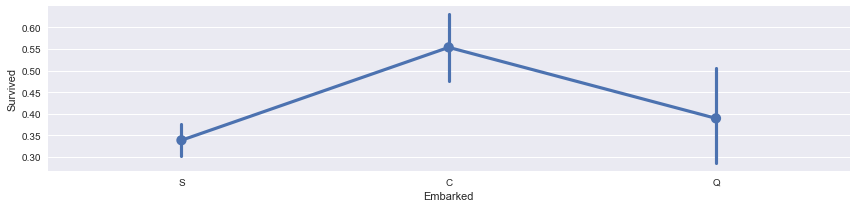

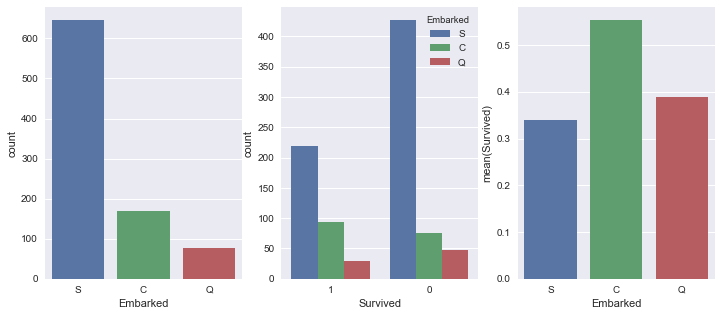

In [8]:
# 由上面的信息可以发现，训练集共有891名乘客的数据量，测试集中有418名乘客的数据量，并且测试集数据只给出了11项特征。
# 将Embarked这一项数据中的缺失值用出现较多的 S 代替。
train_df["Embarked"] = train_df["Embarked"].fillna("S")

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid') # 设置图格式为带网格暗色格式

# 作分类图，Survived 在 Embarked上的分类
sns.factorplot('Embarked','Survived',data=train_df,size=3,aspect=4)


fig,(a1,a2,a3)=plt.subplots(1,3,figsize=(12,5))
# 作分类计数图，按Embarked的各个取值进行计数。
#sns.factorplot('Embarked',data=train_df,kind='count',order=['S','C','Q'])
sns.countplot(x='Embarked',data=train_df,ax=a1)

# 作分类计数图，统计Survived的技术，其中按照Embarked来进行分类技术
#sns.factorplot(x='Survived',hue='Embarked',data=train_df,kind='count',order=[1,0])
sns.countplot(x='Survived',hue='Embarked',data=train_df,order=[1,0],ax=a2)

embark_perc = train_df[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean()
# print(embark_perc.head())
sns.barplot(x='Embarked',y='Survived',data=embark_perc,order=['S','C','Q'],ax=a3)
#sns.factorplot(x='Embarked',y='Survived',data=embark_perc,kind='bar',order=['S','C','Q'])

# 这里相当于将原来的一个Embarked所取的三个值分开，这样原来的一个特征就变成了三个特征【S,C,Q】
embark_dummies_train = pd.get_dummies(train_df["Embarked"])
embark_dummies_test = pd.get_dummies(test_df["Embarked"])
embark_dummies_train.drop(['S'],1,inplace=True)
embark_dummies_test.drop(['S'],1,inplace=True)

train_df = train_df.join(embark_dummies_train)
test_df = test_df.join(embark_dummies_test)

# 将原来的一个特征变成了三个以后，原来的一个特征就可以剔除
train_df.drop(["Embarked"],1,inplace=True)
test_df.drop(["Embarked"],1,inplace=True)

print(test_df.info())





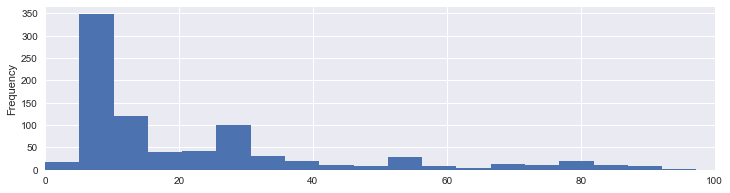

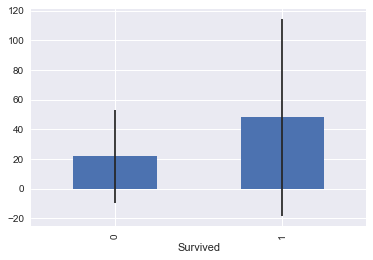

In [9]:
# 接下来就分析另一项特征Fare的影响
# 由前面的info可以发现，对于Fare这一项，只有test_df中有一个缺失值。
# train_df["Fare"].fillna(train_df["Fare"].median(),inplace=True)

from pandas import Series,DataFrame

# 处理test_df数据集中Fare这一特征的缺失值,将缺失值用中位数替代
test_df["Fare"].fillna(test_df["Fare"].median(),inplace=True)

# 将Fare的属性值由浮点型变成整型
train_df["Fare"] = train_df["Fare"].astype(int)
test_df["Fare"] = test_df["Fare"].astype(int)

# 找出Fare中的Survived以及not Survived的乘客
fare_unsurvived = train_df["Fare"][train_df["Survived"] == 0]
fare_survived = train_df["Fare"][train_df["Survived"] == 1]

avgerge_fare = DataFrame([fare_unsurvived.mean(),fare_survived.mean()])
std_fare = DataFrame([fare_unsurvived.std(),fare_survived.std()])

# 统计Fare各个区间的频数直方图，此处只设定Fare值范围为（0，,100）
train_df["Fare"].plot(kind='hist',figsize=(12,3),bins=100,xlim=(0,100))

avgerge_fare.index.names = std_fare.index.names = ["Survived"]
avgerge_fare.plot(yerr=std_fare,kind='bar',legend=False)






D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


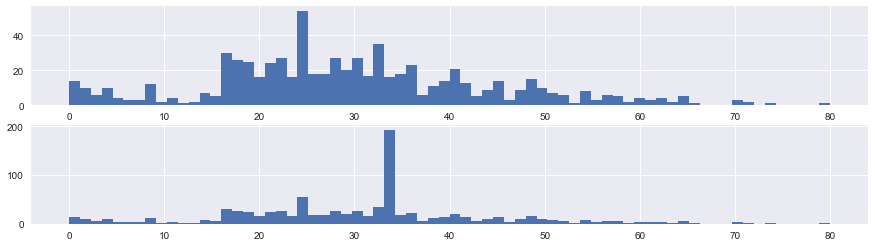

In [10]:
# 现在分析Age这一特征对Survived的影响
import numpy as np
# 首先，由之前数据集的info可知，Age数据有缺失值，所以需要进行预处理

# 补上缺失值
# 训练集区缺失值处理
average_age_train = train_df["Age"].mean()
std_age_train = train_df["Age"].std()
num_NAN_age_train = train_df["Age"].isnull().sum()   # 训练集Age缺失值数目

# 测试集缺失值处理
average_age_test = test_df["Age"].mean()
std_age_test = test_df["Age"].std()
num_NAN_age_test = test_df["Age"].isnull().sum()   # 测试集Age缺失值数目

# 此处可以做两个子图，其一，不考虑缺失值，其二，用随机生成的数补上缺失值

fig,(b1,b2) = plt.subplots(2,1,figsize=(15,4))
# 做直方图统计训练集中去除缺失值时各个年龄区间的乘客数目
train_df["Age"].dropna().astype(int).hist(bins=70,ax=b1)
#test_df["Age"].dropna().astype(int).hist(bins=70,ax=b1)

# 生成训练集替补缺失值得得随机数,范围为：(mean-std,mean+std) 
rand1 = np.random.randint(average_age_train - std_age_train, average_age_train + std_age_train)

# 生成测试集替补缺失值得得随机数,范围为：(mean-std,mean+std) 
rand2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test)

# 为训练集和测试集补上缺失值
train_df["Age"][np.isnan(train_df["Age"])] = rand1
test_df["Age"][np.isnan(test_df["Age"])] = rand2

# 将浮点型的Age属性值变换为整型的
train_df["Age"] = train_df["Age"].astype(int)
test_df["Age"] = test_df["Age"].astype(int)

# 补全缺失值后画出Age的频数直方图
train_df["Age"].hist(bins=70,ax=b2)
#test_df["Age"].hist(bins=70,ax=b2)

# 画出的是训练集在补上缺失值前后的频数直方图（乘客中各个年龄段的人数）



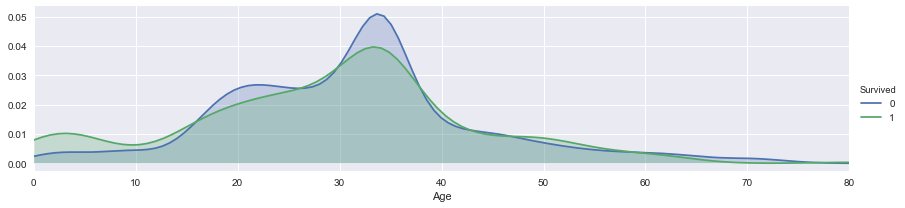

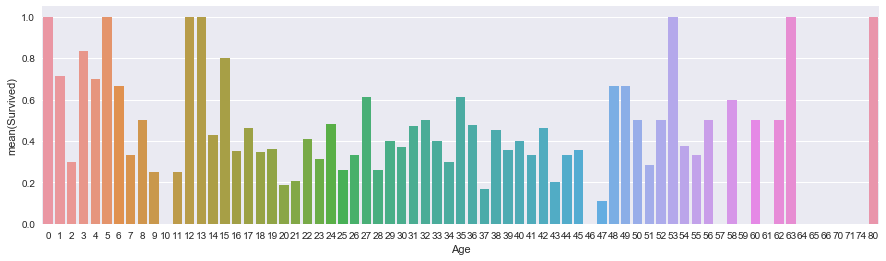

In [11]:
# 下面再来分析各个年龄段的乘客生还者，也就是联合考虑“Age”与“Survived”这两项特征

# FacetGrid类是用来可视化一个变量的分布，或是在数据集中独立子集变量之间的关系的可视化的函数类
facet = sns.FacetGrid(train_df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train_df["Age"].max()))
facet.add_legend()

# 各个年龄段的乘客生还数目平均数

fig,axis1=plt.subplots(1,1,figsize=(15,4))
average_age = train_df[["Age","Survived"]].groupby(["Age"],as_index=False).mean()
sns.barplot(x='Age',y='Survived',data=average_age)



In [12]:
# 对于Cabin这一项， 由于缺失值太多，这里我们不分析这一特征，直接去掉这一特征
train_df.drop(['Cabin'],1,inplace=True)
test_df.drop(['Cabin'],1,inplace=True)


D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[<matplotlib.text.Text at 0xc4b9780>, <matplotlib.text.Text at 0xc7cc630>]

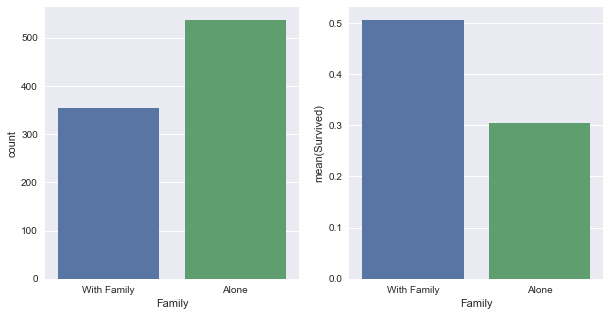

In [13]:
# 现在考虑family因素的影响，在原来的数据中，将Parch特征与SibSp特征综合考虑为Family因素。
train_df['Family'] = train_df["Parch"] + train_df["SibSp"]
train_df['Family'].loc[train_df["Family"] > 0] = 1
train_df['Family'].loc[train_df["Family"] == 0] = 0

# 考虑测试集
test_df['Family'] = test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df["Family"] > 0] = 1
test_df['Family'].loc[test_df["Family"] == 0] = 0

# 将SibSp与Parch这两项特征合并后，就可以剔除
train_df = train_df.drop(['SibSp','Parch'],axis=1)
test_df = test_df.drop(['SibSp','Parch'],axis=1)

fig,(c1,c2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

sns.countplot(x='Family',data=train_df,order=[1,0],ax=c1)

family_perc = train_df[['Family','Survived']].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family',y='Survived',data=family_perc,order=[1,0],ax=c2)

c1.set_xticklabels(['With Family','Alone'],rotation=0)



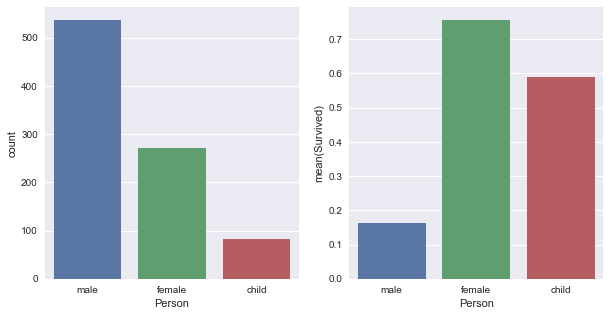

In [14]:
# 现在考虑性别对生存率的影响，由故事背景可知，性别对生存率影响极大，因为女士优先使用救生圈
# 首先，将乘客分为三类，男性、女性、孩童,定义函数进行区分
def get_person(passenger):
    age,sex=passenger
    return 'child' if age < 16 else sex

# 运用上面定义的函数将训练集与测试集的乘客进行分类
train_df['Person'] = train_df[['Age','Sex']].apply(get_person,axis=1) # axis =1 即将 get_person函数应用到train_df[['Age','Sex']]的每一行，每一行对应一位乘客
test_df['Person'] = test_df[['Age','Sex']].apply(get_person,axis=1) # axis =1 即将 get_person函数应用到train_df[['Age','Sex']]的每一行

# 增加了‘Person’列， 可以剔除‘Sex’特征
train_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

# 将person这种类别变量转化为虚拟变量
person_dummies_train = pd.get_dummies(train_df['Person'])
person_dummies_train.columns = ['Child','Male','Female']
person_dummies_train.drop(['Male'],axis=1,inplace=True)

person_dummies_test = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Male','Female']
person_dummies_test.drop(['Male'],axis=1,inplace=True)

train_df = train_df.join(person_dummies_train)
test_df = test_df.join(person_dummies_test)

fig,(d1,d2) = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='Person',data=train_df,ax=d1)

person_perc = train_df[['Person','Survived']].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person',y='Survived',data=person_perc,ax=d2,order=['male','female','child'])

train_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)









<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Age         891 non-null int32
Fare        891 non-null int32
C           891 non-null uint8
Q           891 non-null uint8
Family      891 non-null int64
Child       891 non-null uint8
Female      891 non-null uint8
Class_1     891 non-null uint8
Class_2     891 non-null uint8
dtypes: int32(2), int64(2), uint8(6)
memory usage: 26.2 KB
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Age            418 non-null int32
Fare           418 non-null int32
C              418 non-null uint8
Q              418 non-null uint8
Family         418 non-null int64
Child          418 non-null uint8
Female         418 non-null uint8
Class_1        418 non-null uint8
Class_2        418 non-null uint8
dtypes: int32(2), int64(2), 

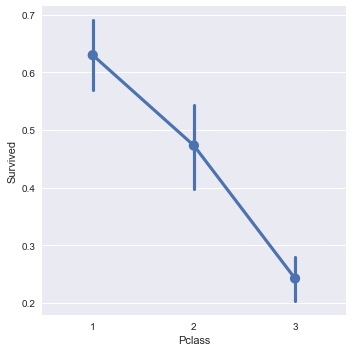

In [15]:
# 做分类图，Survivied在Pclass上的分类
sns.factorplot('Pclass','Survived',order=[1,2,3],data=train_df,size=5)

pclass_dummies_train = pd.get_dummies(train_df['Pclass'])
pclass_dummies_train.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_train.drop(['Class_3'],axis=1,inplace=True)


pclass_dummies_test = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'],axis=1,inplace=True)

train_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

train_df = train_df.join(pclass_dummies_train)
test_df = test_df.join(pclass_dummies_test)

# 此时经过处理之后的训练集信息
train_df.info()

print('----------------------------------------------------')
# 此时经过处理之后的测试集信息
test_df.info()


### 4. 分类器训练 

本次实验采用逻辑回归、SVM、随机森林、KNN、NB五种典型的分类器，分别用上述构造的特征数据进行训练。

In [16]:
# 由上面对每一项的分析可以发现，测试集与训练集最后留下的都是10个特征属性，并且留下的特征都是对生存率有影响的特征属性
# 下面可以利用机器学习的方法进行训练，可以利用不同的方法进行训练，需要导入不同的机器学习方法模块
# 需要分析生还者预测，这是一个典型的二分类问题

from sklearn.linear_model import LogisticRegression # 几何几率回归（是一种分类学习算法）
from sklearn.svm import SVC,LinearSVC               # 支持向量机分类
from sklearn.ensemble import RandomForestClassifier  # 随机森林分类
from sklearn.neighbors import KNeighborsClassifier   # K近邻分类
from sklearn.naive_bayes import GaussianNB           # 高斯朴素贝叶斯


# 对于训练集，数据集为除了Survived之外的其他属性，Survived为回归输出结果
X_train = train_df.drop("Survived",axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId",axis=1).copy()

print('-------------------------------------------------------------------------------')
# 首先进行几何纪律回归分析
LR = LogisticRegression()
LR.fit(X_train,Y_train)   # 利用fit方法进行
Y_pred_LR = LR.predict(X_test) # 这里返回的是每个样本经过分类后所属的类标签
print('LogisticRegression Score is:',LR.score(X_train,Y_train))

#print(Y_pred)
print('-------------------------------------------------------------------------------')

# 然后进行支持向量机分类法的学习,SVM是建立在统计机器学习上的一种分类算法
svc = SVC()
svc.fit(X_train,Y_train)
Y_pred_SVM = svc.predict(X_test)
print('SVM Score is:',svc.score(X_train,Y_train))

print('---------------------------------------------------------------------------------')
# 接下来进行随机森林分类算法学习
RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(X_train,Y_train)
Y_pred_RFC = RFC.predict(X_test)
print('RandomFroestClassifier Score is:',RFC.score(X_train,Y_train))

print('----------------------------------------------------------------------------------')
 
# 在接下来进行KNeighborsClassifier分类的学习
KNC = KNeighborsClassifier(n_neighbors =3)
KNC.fit(X_train,Y_train)
Y_pred_KNC = KNC.predict(X_test)
print('KNeighborsClassifier Score is:',KNC.score(X_train,Y_train))

print('-----------------------------------------------------------------------------------')
# 最后进行高斯朴素贝叶斯分类学习
GNB = GaussianNB()
GNB.fit(X_train,Y_train)
Y_pred_GNB = GNB.predict(X_test)
print('GaussianNB Score is:',GNB.score(X_train,Y_train))
print('------------------------------------------------------------------------------------')

-------------------------------------------------------------------------------
LogisticRegression Score is: 0.809203142536
-------------------------------------------------------------------------------
SVM Score is: 0.854096520763
---------------------------------------------------------------------------------
RandomFroestClassifier Score is: 0.962962962963
----------------------------------------------------------------------------------
KNeighborsClassifier Score is: 0.835016835017
-----------------------------------------------------------------------------------
GaussianNB Score is: 0.745230078563
------------------------------------------------------------------------------------


In [17]:
# 利用几何几率回归分析得到的回归函数的系数
coeff_df = DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(LR.coef_[0])

coeff_df

,Features,Coefficient Estimate
0,Age,-0.017278
1,Fare,0.001062
2,C,0.623710
3,Q,0.360246
4,Family,-0.310101
5,Child,-0.564224
6,Female,-2.815933
7,Class_1,2.035345
8,Class_2,1.161277


### 5. 分类结果 

In [18]:
# 将分析得到的测试集的预测结果以文件的形式输出保存
submission1 = pd.DataFrame({
        "PassengerId":test_df["PassengerId"],
        "Survived":Y_pred_LR
    })

submission1.to_csv('Test_Result_LR.csv',index=False)

In [19]:
submission2 = pd.DataFrame({
        "PassengerId":test_df["PassengerId"],
        "Survived":Y_pred_SVM
    })

submission1.to_csv('Test_Result_SVM.csv',index=False)

In [20]:
submission3 = pd.DataFrame({
        "PassengerId":test_df["PassengerId"],
        "Survived":Y_pred_RFC
    })

submission3.to_csv('Test_Result_RFC.csv',index=False)

In [21]:
submission4 = pd.DataFrame({
        "PassengerId":test_df["PassengerId"],
        "Survived":Y_pred_KNC
    })

submission4.to_csv('Test_Result_KNC.csv',index=False)

In [22]:
submission5 = pd.DataFrame({
        "PassengerId":test_df["PassengerId"],
        "Survived":Y_pred_GNB
    })

submission5.to_csv('Test_Result_GNB.csv',index=False)